## E8. Branch and bound algorithm for integer programming

Hiba Nejjari

In [1]:
import pandas as pd

#data for the CSV
data = {
    "Project": [1, 2, 3, 4, 5, 6],
    "Revenue": [15, 20, 5, 25, 22, 17],
    "Days": [51, 60, 40, 62, 63, 10]
}

df = pd.DataFrame(data)

#saving the DataFrame to a CSV file
df.to_csv('projects.csv', index=False)

print("CSV file 'projects.csv' created successfully.")


CSV file 'projects.csv' created successfully.


Best solution (binary): [0, 0, 0, 1, 1, 1]
Best solution (indices): [4, 5, 6]
Best revenue: 64


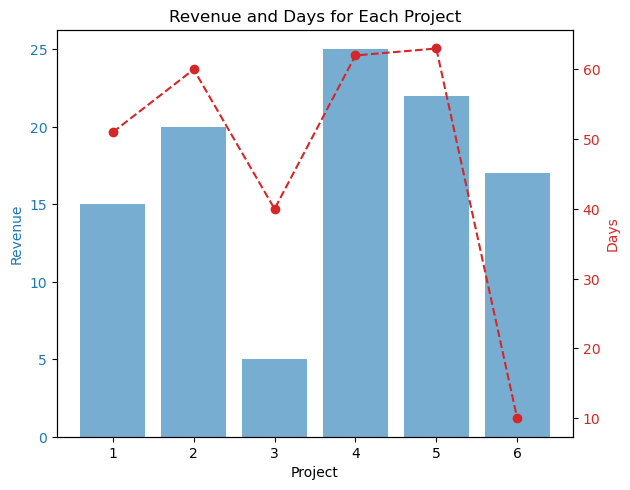

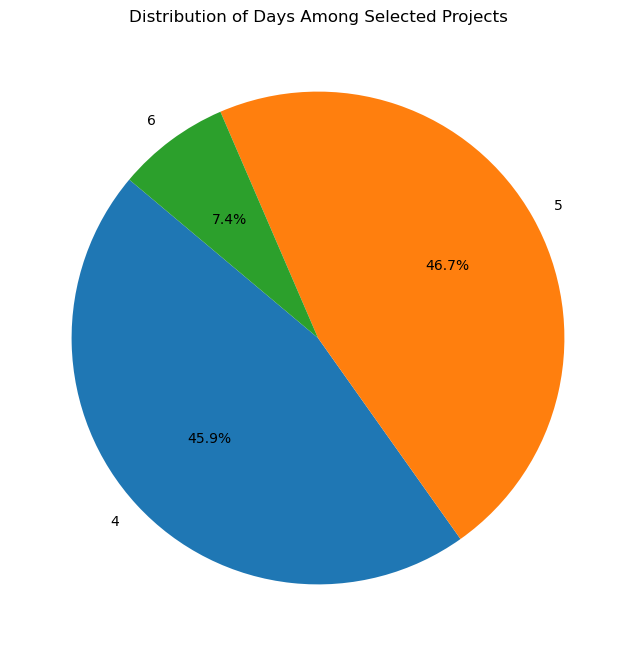

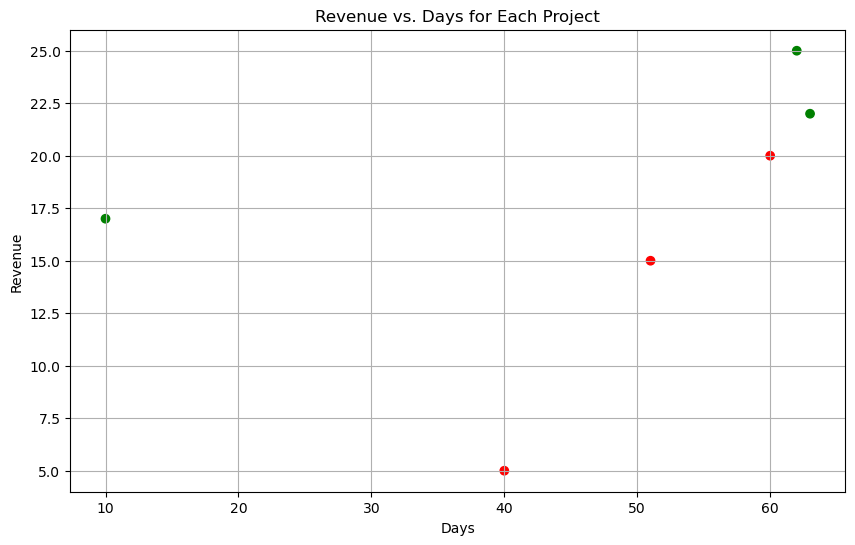

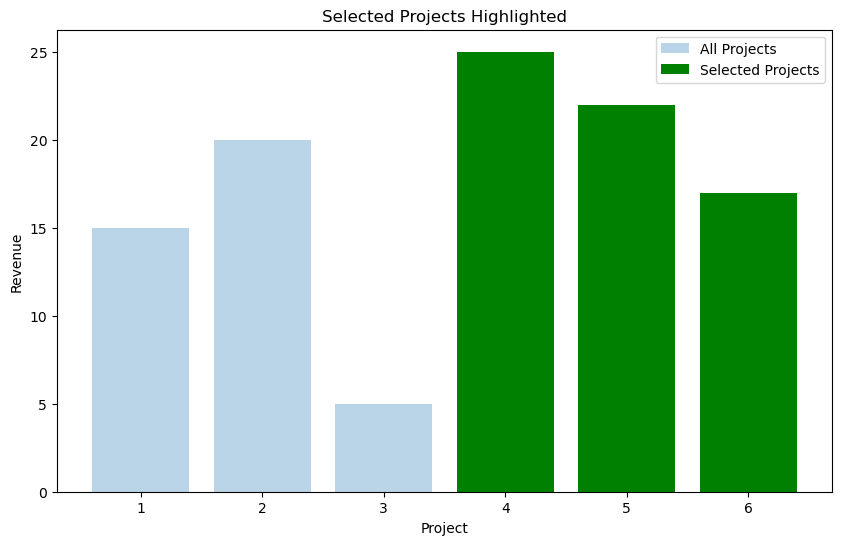

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class BranchAndBound:
    def __init__(self, revenues, days, max_days):
        #initializing the object with given revenues, days, and maximum researcher days
        self.revenues = revenues
        self.days = days
        self.max_days = max_days
        self.n = len(revenues)
        self.best_solution = None
        self.best_revenue = -np.inf
        self.best_solution_indices = []

    def branch_and_bound(self):
        #starting the branch and bound process
        self._bb(0, 0, 0, [0]*self.n)
        return self.best_solution, self.best_solution_indices, self.best_revenue

    def _bb(self, i, current_revenue, current_days, solution):
        #if current days exceed max days, return
        if current_days > self.max_days:
            return
        
        #if all projects have been considered, update best solution if current revenue is better
        if i == self.n:
            if current_revenue > self.best_revenue:
                self.best_revenue = current_revenue
                self.best_solution = solution.copy()
                self.best_solution_indices = [index + 1 for index, val in enumerate(solution) if val == 1]
            return

        #including the current project and recurse
        solution[i] = 1
        self._bb(i+1, current_revenue + self.revenues[i], current_days + self.days[i], solution)

        #excluding the current project and recurse
        solution[i] = 0
        self._bb(i+1, current_revenue, current_days, solution)

def plot_results(df, best_solution, best_solution_indices, best_revenue):
    projects = df['Project']
    revenues = df['Revenue']
    days = df['Days']
    
    #bar plot showing revenue and days for each project
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Project')
    ax1.set_ylabel('Revenue', color='tab:blue')
    ax1.bar(projects, revenues, color='tab:blue', alpha=0.6, label='Revenue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Days', color='tab:red')
    ax2.plot(projects, days, color='tab:red', marker='o', linestyle='--', label='Days')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title('Revenue and Days for Each Project')
    plt.show()

    #pie chart showing the distribution of days among the selected projects
    selected_days = [days[i] for i in range(len(days)) if best_solution[i] == 1]
    selected_projects = [projects[i] for i in range(len(projects)) if best_solution[i] == 1]
    plt.figure(figsize=(8, 8))
    plt.pie(selected_days, labels=selected_projects, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Days Among Selected Projects')
    plt.show()

    #scatter plot showing the relationship between revenue and days for each project
    colors = ['green' if best_solution[i] == 1 else 'red' for i in range(len(projects))]
    plt.figure(figsize=(10, 6))
    plt.scatter(days, revenues, c=colors, marker='o')
    plt.xlabel('Days')
    plt.ylabel('Revenue')
    plt.title('Revenue vs. Days for Each Project')
    plt.grid(True)
    plt.show()

    #bar plot highlighting selected projects
    selected_revenues = [revenues[i] if best_solution[i] == 1 else 0 for i in range(len(revenues))]
    plt.figure(figsize=(10, 6))
    plt.bar(projects, revenues, alpha=0.3, label='All Projects')
    plt.bar(projects, selected_revenues, color='green', label='Selected Projects')
    plt.xlabel('Project')
    plt.ylabel('Revenue')
    plt.title('Selected Projects Highlighted')
    plt.legend()
    plt.show()

def main():
    #reading input data from CSV file
    df = pd.read_csv('projects.csv')
    revenues = df['Revenue'].to_numpy()
    days = df['Days'].to_numpy()
    max_days = 150  #assuming the maximum researcher days available is 150 (can change)

    #initializing the BranchAndBound object with the read data and max days
    bb = BranchAndBound(revenues, days, max_days)
    best_solution, best_solution_indices, best_revenue = bb.branch_and_bound()

    #printing the best solution and revenue
    print("Best solution (binary):", best_solution)
    print("Best solution (indices):", best_solution_indices)
    print("Best revenue:", best_revenue)

    #plotting the results
    plot_results(df, best_solution, best_solution_indices, best_revenue)

if __name__ == "__main__":
    main()


The total days (135) do not exceed the maximum allowed days (150), making it a valid and optimal solution.

### Analysis of the Results Using the Branch and Bound Algorithm

#### Revenue and Days for Each Project

Projects 4, 5, and 6 have been highlighted, indicating they are part of the optimal solution. Project 4 has the highest revenue, while Project 6 requires the least number of days.

The plot shows a trade-off between revenue and the days required. Project 3, although requiring fewer days, provides significantly less revenue compared to others.

#### Distribution of Days Among Selected Projects

Projects 4 and 5 together consume the majority of the available days, with each taking about 46% of the total days. Project 6, although contributing a smaller portion of days, is still part of the optimal solution due to its favorable revenue-to-days ratio.

#### Revenue vs. Days for each project

Projects selected by the algorithm are colored green, while unselected projects are colored red. Selected projects lie towards the upper right of the plot, indicating a higher revenue.

There is a clear positive correlation between the days required and the revenue generated, but the selected projects optimize this relationship by providing higher revenue for the days invested.

#### Highlighting Selected Projects bar plot

The green bars represent the selected projects (4, 5, and 6), while the faded bars represent the unselected projects. The selected projects clearly stand out in terms of revenue generation.

The optimal selection made by the Branch and Bound algorithm ensures that the projects chosen are the ones that maximize revenue without exceeding the constraint on the total number of researcher days.


### Conclusion

The Branch and Bound algorithm effectively identified the optimal combination of projects that maximized the total revenue while adhering to the constraint on the number of available researcher days. 

The visualizations confirm that the selected projects (4, 5, and 6) are those that provide the highest returns relative to the days required, highlighting the algorithm's capability to balance multiple constraints and objectives efficiently. 

Exemple if we change the max days 

Best solution (binary): [0, 1, 0, 1, 1, 1]
Best solution (indices): [2, 4, 5, 6]
Best revenue: 84


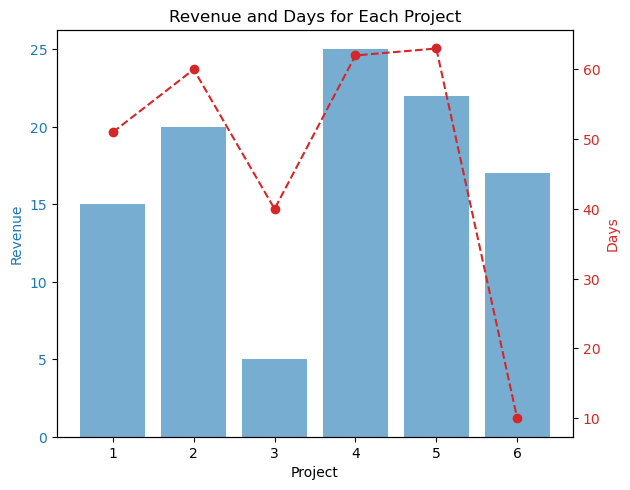

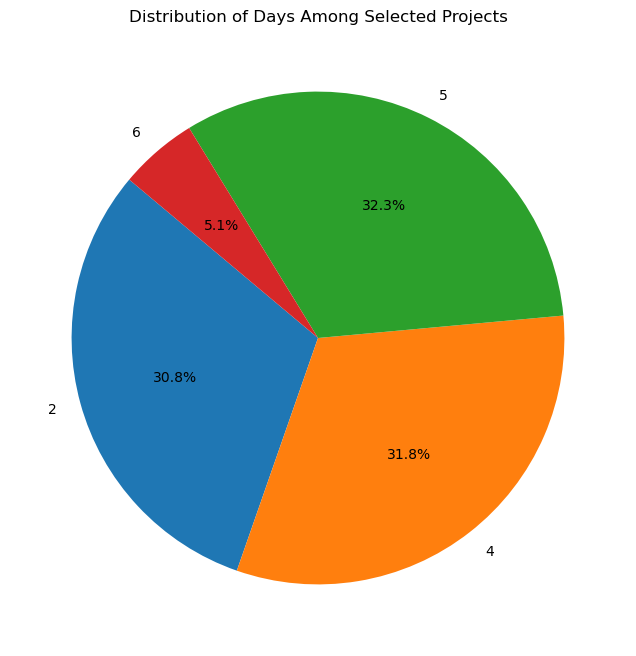

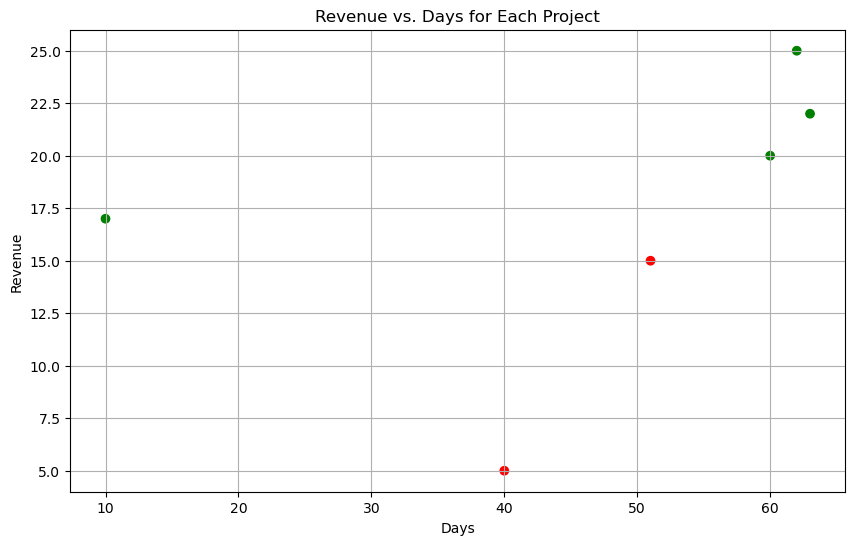

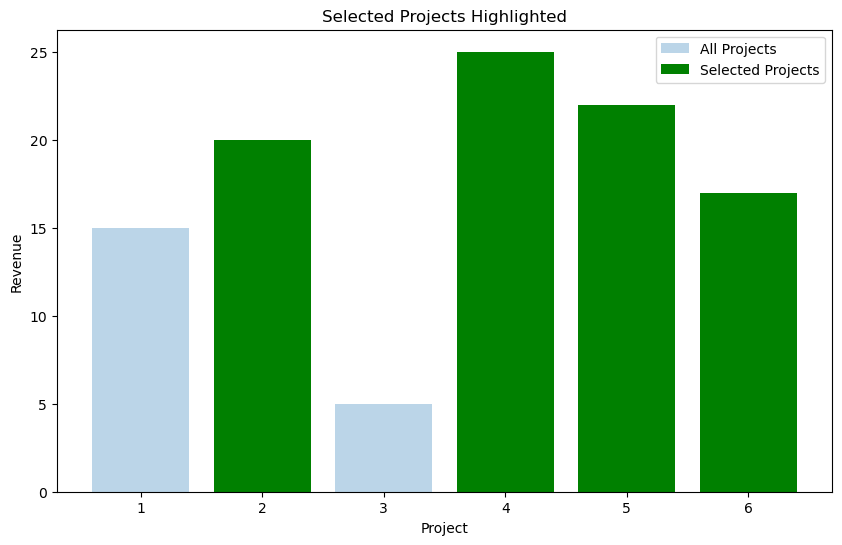

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class BranchAndBound:
    def __init__(self, revenues, days, max_days):
        #initializing the object with given revenues, days, and maximum researcher days
        self.revenues = revenues
        self.days = days
        self.max_days = max_days
        self.n = len(revenues)
        self.best_solution = None
        self.best_revenue = -np.inf
        self.best_solution_indices = []

    def branch_and_bound(self):
        #starting the branch and bound process
        self._bb(0, 0, 0, [0]*self.n)
        return self.best_solution, self.best_solution_indices, self.best_revenue

    def _bb(self, i, current_revenue, current_days, solution):
        #if current days exceed max days, return
        if current_days > self.max_days:
            return
        
        #if all projects have been considered, update best solution if current revenue is better
        if i == self.n:
            if current_revenue > self.best_revenue:
                self.best_revenue = current_revenue
                self.best_solution = solution.copy()
                self.best_solution_indices = [index + 1 for index, val in enumerate(solution) if val == 1]
            return

        #including the current project and recurse
        solution[i] = 1
        self._bb(i+1, current_revenue + self.revenues[i], current_days + self.days[i], solution)

        #excluding the current project and recurse
        solution[i] = 0
        self._bb(i+1, current_revenue, current_days, solution)

def plot_results(df, best_solution, best_solution_indices, best_revenue):
    projects = df['Project']
    revenues = df['Revenue']
    days = df['Days']
    
    #bar plot showing revenue and days for each project
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Project')
    ax1.set_ylabel('Revenue', color='tab:blue')
    ax1.bar(projects, revenues, color='tab:blue', alpha=0.6, label='Revenue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Days', color='tab:red')
    ax2.plot(projects, days, color='tab:red', marker='o', linestyle='--', label='Days')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title('Revenue and Days for Each Project')
    plt.show()

    #pie chart showing the distribution of days among the selected projects
    selected_days = [days[i] for i in range(len(days)) if best_solution[i] == 1]
    selected_projects = [projects[i] for i in range(len(projects)) if best_solution[i] == 1]
    plt.figure(figsize=(8, 8))
    plt.pie(selected_days, labels=selected_projects, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Days Among Selected Projects')
    plt.show()

    #scatter plot showing the relationship between revenue and days for each project
    colors = ['green' if best_solution[i] == 1 else 'red' for i in range(len(projects))]
    plt.figure(figsize=(10, 6))
    plt.scatter(days, revenues, c=colors, marker='o')
    plt.xlabel('Days')
    plt.ylabel('Revenue')
    plt.title('Revenue vs. Days for Each Project')
    plt.grid(True)
    plt.show()

    #bar plot highlighting selected projects
    selected_revenues = [revenues[i] if best_solution[i] == 1 else 0 for i in range(len(revenues))]
    plt.figure(figsize=(10, 6))
    plt.bar(projects, revenues, alpha=0.3, label='All Projects')
    plt.bar(projects, selected_revenues, color='green', label='Selected Projects')
    plt.xlabel('Project')
    plt.ylabel('Revenue')
    plt.title('Selected Projects Highlighted')
    plt.legend()
    plt.show()

def main():
    #reading input data from CSV file
    df = pd.read_csv('projects.csv')
    revenues = df['Revenue'].to_numpy()
    days = df['Days'].to_numpy()
    max_days = 200 #assuming the maximum researcher days available is 150 (can change)

    #initializing the BranchAndBound object with the read data and max days
    bb = BranchAndBound(revenues, days, max_days)
    best_solution, best_solution_indices, best_revenue = bb.branch_and_bound()

    #printing the best solution and revenue
    print("Best solution (binary):", best_solution)
    print("Best solution (indices):", best_solution_indices)
    print("Best revenue:", best_revenue)

    #plotting the results
    plot_results(df, best_solution, best_solution_indices, best_revenue)

if __name__ == "__main__":
    main()
